<a href="https://colab.research.google.com/github/AashRoxx/Data_science_projects/blob/main/California_housing/California_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
df = fetch_california_housing()
#df = pd.DataFrame(df['data'])
x = df['data']
y = df['target']

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.75, random_state=42)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [6]:
model = tf.keras.Sequential()

In [7]:
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

In [8]:
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics=tf.keras.metrics.MeanSquaredError())
a = model.fit(x_train,y_train,batch_size=20,epochs=20, validation_split=0.175)

Epoch 1/20
213/213 [==============================] - 2s 5ms/step - loss: 39729.7812 - mean_squared_error: 39729.7812 - val_loss: 276.5332 - val_mean_squared_error: 276.5332
Epoch 2/20
213/213 [==============================] - 1s 3ms/step - loss: 102.3945 - mean_squared_error: 102.3945 - val_loss: 14.3186 - val_mean_squared_error: 14.3186
Epoch 3/20
213/213 [==============================] - 1s 4ms/step - loss: 13.5311 - mean_squared_error: 13.5311 - val_loss: 7.2866 - val_mean_squared_error: 7.2866
Epoch 4/20
213/213 [==============================] - 1s 4ms/step - loss: 5.4347 - mean_squared_error: 5.4347 - val_loss: 1.6251 - val_mean_squared_error: 1.6251
Epoch 5/20
213/213 [==============================] - 1s 4ms/step - loss: 3.1146 - mean_squared_error: 3.1146 - val_loss: 1.1185 - val_mean_squared_error: 1.1185
Epoch 6/20
213/213 [==============================] - 1s 4ms/step - loss: 2.4422 - mean_squared_error: 2.4422 - val_loss: 1.0666 - val_mean_squared_error: 1.0666
Epoch 7/

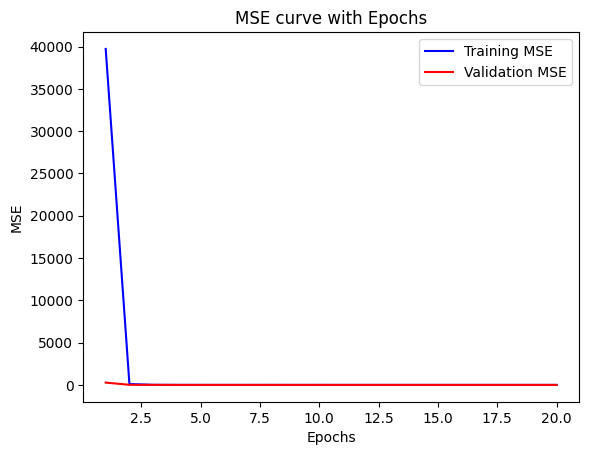

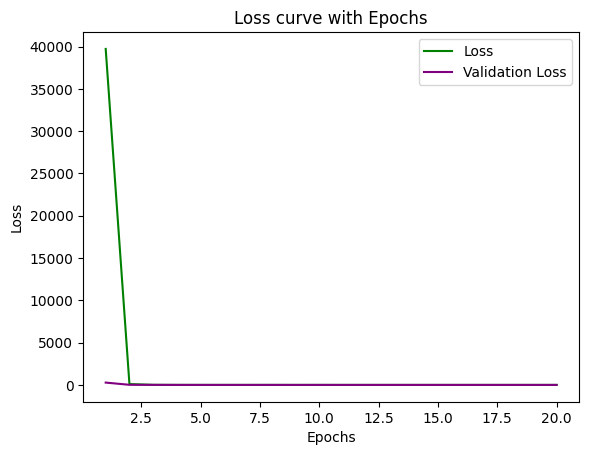

In [9]:
# Plotting and Visualising

modelmse = a.history["mean_squared_error"]
modelvmse = a.history["val_mean_squared_error"]
modelloss = a.history["loss"]
modelvalloss = a.history["val_loss"]
epochs_list = range(1,21)

plt.plot(epochs_list, modelmse, 'blue', label='Training MSE')
plt.plot(epochs_list, modelvmse, 'red', label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('MSE curve with Epochs')
plt.legend()
plt.show()

#Loss Plot
plt.plot(epochs_list, modelloss, 'green', label="Loss")
plt.plot(epochs_list, modelvalloss, 'purple', label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss curve with Epochs')
plt.legend()
plt.show()

In [10]:
y_pred = model.predict(x_test)

from sklearn.metrics import mean_squared_error
rms= np.sqrt(mean_squared_error(y_test, y_pred))

variation = rms/np.mean(y_test)*100
print("Root Mean Squared Error is", rms)
print("Variation is",variation)

484/484 [==============================] - 1s 2ms/step
Root Mean Squared Error is 1.1564435874228167
Variation is 55.94311381868404


In [11]:
x_train.shape

(5160, 8)

In [12]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
inputA = tf.keras.layers.Input(shape=[5])
inputB = tf.keras.layers.Input(shape=[6] )
hidden1= tf.keras.layers.Dense(30, activation='relu')(inputB)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat = tf.keras.layers.Concatenate()([hidden2, inputA])
outputs = tf.keras.layers.Dense(1, activation='linear')(concat)

functional = tf.keras.models.Model(inputs=[inputA,inputB], outputs=outputs)

functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 30)           210         ['input_2[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 30)           930         ['dense_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 5)]          0           []                               
                                                                                              

In [13]:
functional.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics=tf.keras.metrics.MeanSquaredError())
f = functional.fit([x_train[:,:5], x_train[:,2:]],y_train,batch_size=20,epochs=20, validation_split=0.175)

Epoch 1/20
213/213 [==============================] - 4s 3ms/step - loss: 11068.4551 - mean_squared_error: 11068.4551 - val_loss: 14.5250 - val_mean_squared_error: 14.5250
Epoch 2/20
213/213 [==============================] - 0s 2ms/step - loss: 14.5551 - mean_squared_error: 14.5551 - val_loss: 14.1133 - val_mean_squared_error: 14.1133
Epoch 3/20
213/213 [==============================] - 0s 2ms/step - loss: 13.7690 - mean_squared_error: 13.7690 - val_loss: 13.3228 - val_mean_squared_error: 13.3228
Epoch 4/20
213/213 [==============================] - 1s 2ms/step - loss: 13.0072 - mean_squared_error: 13.0072 - val_loss: 12.3328 - val_mean_squared_error: 12.3328
Epoch 5/20
213/213 [==============================] - 0s 2ms/step - loss: 12.2458 - mean_squared_error: 12.2458 - val_loss: 11.4788 - val_mean_squared_error: 11.4788
Epoch 6/20
213/213 [==============================] - 0s 2ms/step - loss: 11.4232 - mean_squared_error: 11.4232 - val_loss: 10.5564 - val_mean_squared_error: 10.556

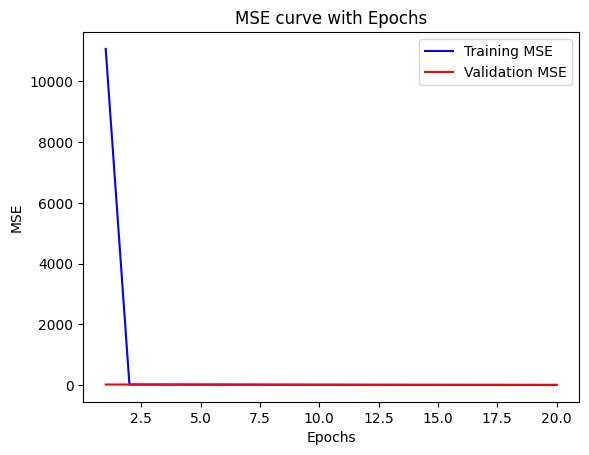

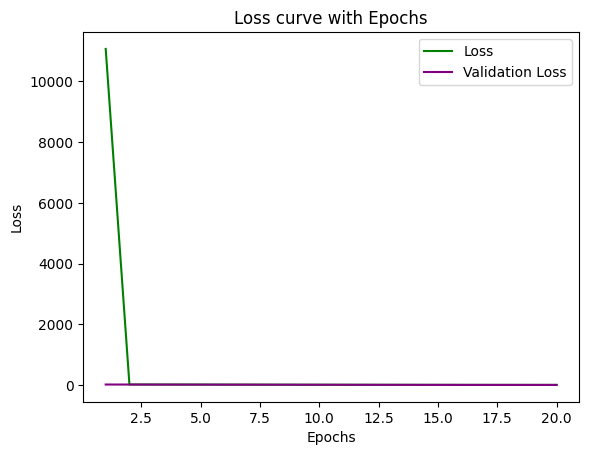

In [14]:
# Plotting and Visualising

funcmse = f.history["mean_squared_error"]
funcvmse = f.history["val_mean_squared_error"]
funcloss = f.history["loss"]
funcvalloss = f.history["val_loss"]
epochs_list = range(1,21)

plt.plot(epochs_list, funcmse, 'blue', label='Training MSE')
plt.plot(epochs_list, funcvmse, 'red', label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('MSE curve with Epochs')
plt.legend()
plt.show()

#Loss Plot
plt.plot(epochs_list, funcloss, 'green', label="Loss")
plt.plot(epochs_list, funcvalloss, 'purple', label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss curve with Epochs')
plt.legend()
plt.show()

In [15]:
y_pred_func = functional.predict([x_test[:,:5], x_test[:,2:]])
funcrms= np.sqrt(mean_squared_error(y_test, y_pred_func))

funcvariation = funcrms/np.mean(y_test)*100
print("Root Mean Squared Error is", funcrms)
print("Variation is", funcvariation)

484/484 [==============================] - 1s 2ms/step
Root Mean Squared Error is 1.1422551562502812
Variation is 55.2567465556145


The Validation RMSE(accuracy) of model1 is 35.07 and loss(mse) in 0.53

The Validation RMSE(accuracy) of Functional Model is 37.701 and loss(mse) is 0.60

Thus, the Functinal Model works better on the dataset.